**Imports**

In [27]:
%load_ext autoreload
%autoreload 2
from data_preprocessing import preprocess_data
from feature_extraction import get_feature_extractor
from model_training import train_model
from model_evaluation import evaluate_model
from config import MODELS
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


**Preprocess Info**

Class mapping:
  0 = Glioma
  1 = Meningioma
  2 = None
  3 = Pituitary

Original class distribution:
  Class 0: 926 images
  Class 1: 937 images
  Class 2: 500 images
  Class 3: 901 images

Augmenting class 0 with 11 synthetic samples...


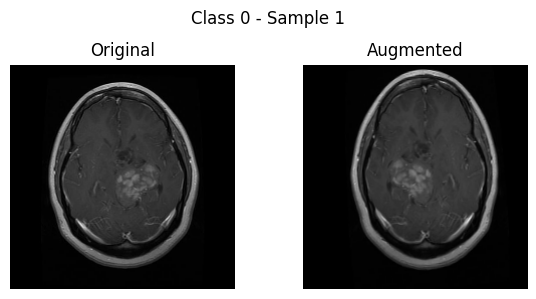

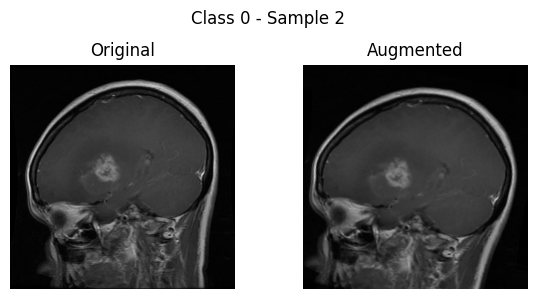

Augmenting class 2 with 437 synthetic samples...


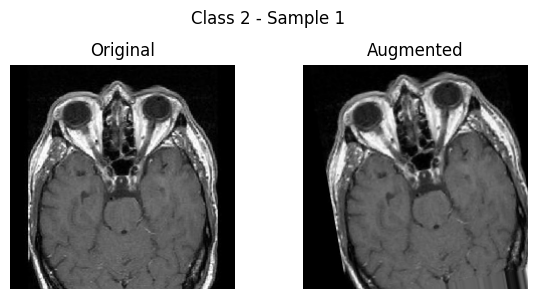

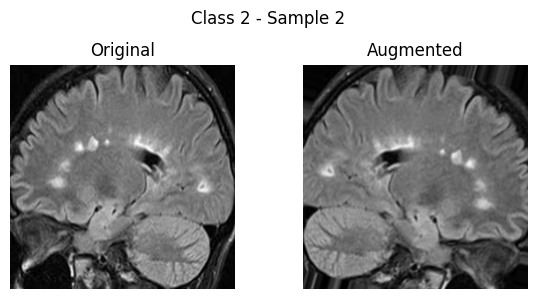

Augmenting class 3 with 36 synthetic samples...


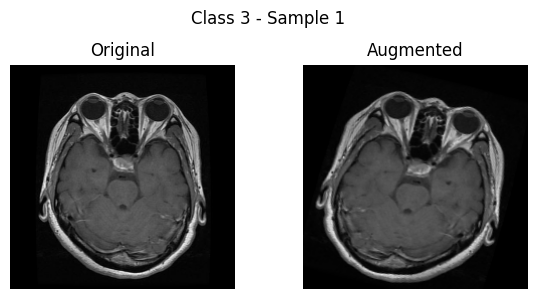

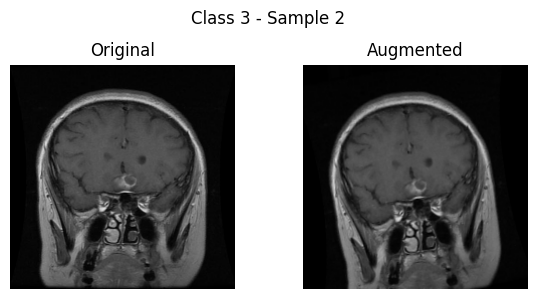

Augmented balanced class distribution:
  Class 0: 937 images
  Class 1: 937 images
  Class 2: 937 images
  Class 3: 937 images

Final balanced dataset shape:
  Images: (3748, 224, 224, 3)
  Labels: (3748,)

Train dataset distribution: [656, 656, 655, 656]
Test dataset distribution: [281, 281, 282, 281]


In [28]:
model_name = MODELS[0]  
X_train, X_test, y_train, y_test, class_names = preprocess_data(model_name, verbose=True)
trained_models = {}

**ResNet50 Training**

In [30]:
model = get_feature_extractor(model_name)
model = train_model(model, model_name, X_train, y_train)

trained_models[model_name] = {
    "model": model,
    "X_test": X_test,
    "y_test": y_test,
    "class_names": class_names
}

print(f"{model_name} training complete!")


Training Fold 1...
Epoch 1/2


KeyboardInterrupt: 

**VGG16 Training**

In [15]:
model_name = MODELS[1]  

X_train, X_test, y_train, y_test, class_names = preprocess_data(model_name, verbose=False, visualize=False)

model = get_feature_extractor(model_name)
model = train_model(model, model_name, X_train, y_train)

trained_models[model_name] = {
    "model": model,
    "X_test": X_test,
    "y_test": y_test,
    "class_names": class_names
}

print(f"{model_name} training complete!")


Training Fold 1...
Epoch 1/2
19/41 ━━━━━━━━━━━━━━━━━━━━ 20s 941ms/step - accuracy: 0.3800 - loss: 29.7001

KeyboardInterrupt: 

**EfficientNetB0 Training**

In [ ]:
model_name = MODELS[2]  

X_train, X_test, y_train, y_test, class_names = preprocess_data(model_name, verbose=False)

model = get_feature_extractor(model_name)
model = train_model(model, model_name, X_train, y_train)

trained_models[model_name] = {
    "model": model,
    "X_test": X_test,
    "y_test": y_test,
    "class_names": class_names
}

print(f"{model_name} training complete!")

**InceptionV3 Training**

In [ ]:
model_name = MODELS[3]  

X_train, X_test, y_train, y_test, class_names = preprocess_data(model_name, verbose=False)

model = get_feature_extractor(model_name)
model = train_model(model, model_name, X_train, y_train)

trained_models[model_name] = {
    "model": model,
    "X_test": X_test,
    "y_test": y_test,
    "class_names": class_names
}

print(f"{model_name} training complete!")

**ResNet50 Evaluation**


Evaluating model: ResNet50
36/36 ━━━━━━━━━━━━━━━━━━━━ 15s 399ms/step
Classification Report:
              precision    recall  f1-score   support

      Glioma       0.95      0.78      0.86       281
  Meningioma       0.76      0.94      0.84       281
        None       0.97      0.90      0.93       282
   Pituitary       0.94      0.95      0.95       281

    accuracy                           0.89      1125
   macro avg       0.90      0.89      0.89      1125
weighted avg       0.90      0.89      0.89      1125

Accuracy: 0.89


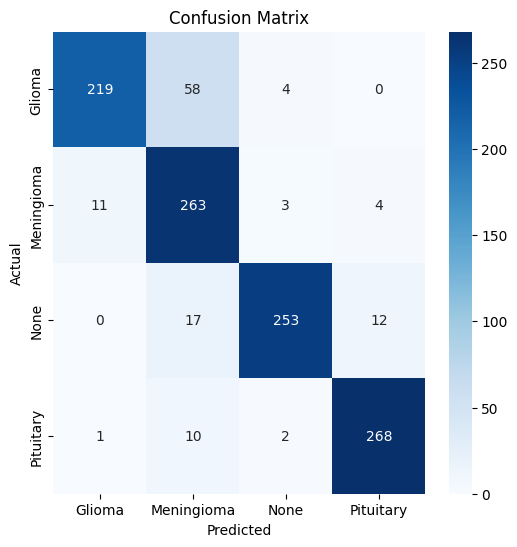

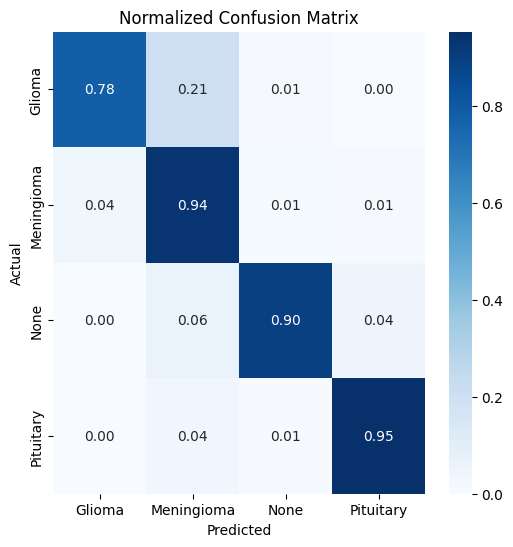

Multiclass ROC AUC Score: 0.98


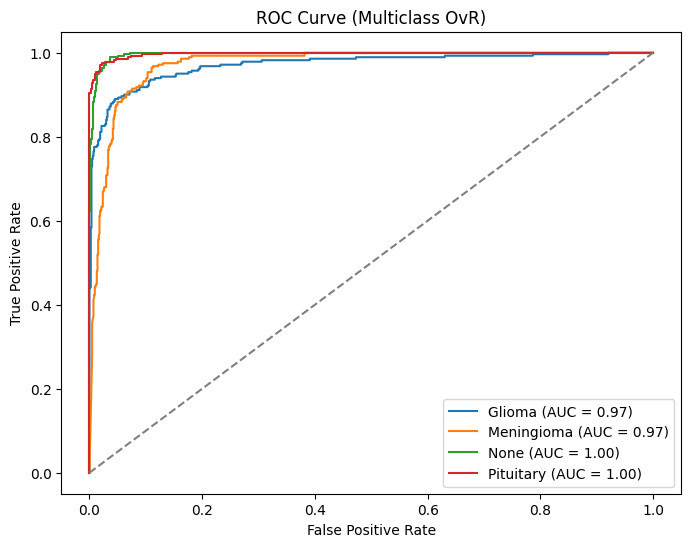

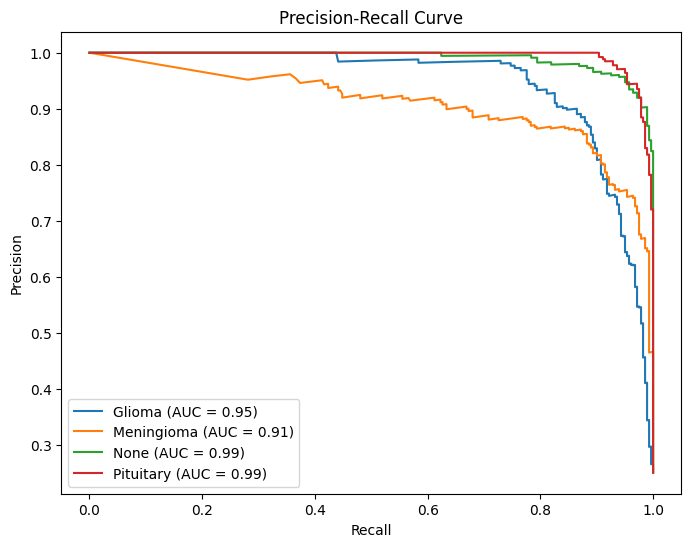

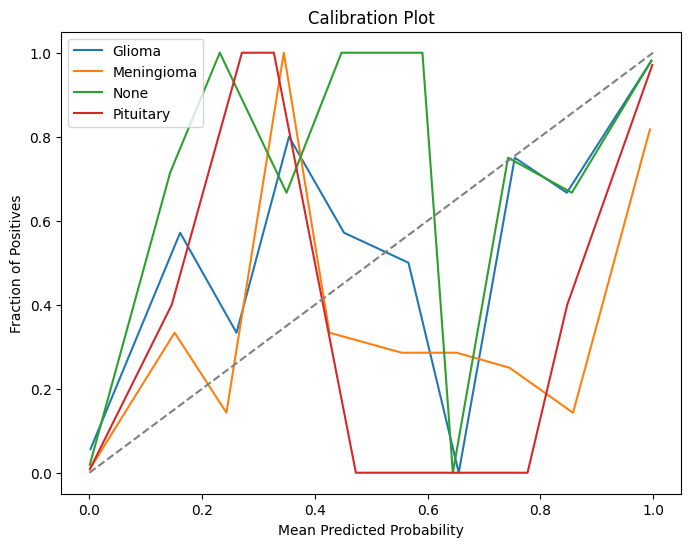

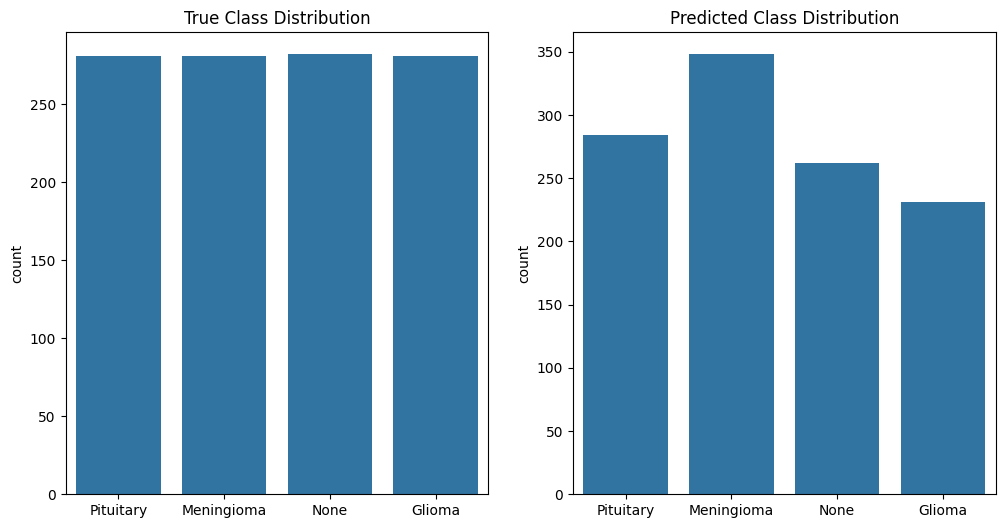

In [9]:
model_name = MODELS[0] 

if model_name in trained_models:
    print(f"\nEvaluating model: {model_name}")
    evaluate_model(
        trained_models[model_name]["model"],
        trained_models[model_name]["X_test"],
        trained_models[model_name]["y_test"],
        trained_models[model_name]["class_names"]
    )
else:
    print(f"Model {model_name} not found in trained_models.")

**VGG16 Evaluation**

In [ ]:
model_name = MODELS[1] 

if model_name in trained_models:
    print(f"\nEvaluating model: {model_name}")
    evaluate_model(
        trained_models[model_name]["model"],
        trained_models[model_name]["X_test"],
        trained_models[model_name]["y_test"],
        trained_models[model_name]["class_names"]
    )
else:
    print(f"Model {model_name} not found in trained_models.")

**EfficientNetB0 Evaluation**

In [ ]:
model_name = MODELS[2] 

if model_name in trained_models:
    print(f"\nEvaluating model: {model_name}")
    evaluate_model(
        trained_models[model_name]["model"],
        trained_models[model_name]["X_test"],
        trained_models[model_name]["y_test"],
        trained_models[model_name]["class_names"]
    )
else:
    print(f"Model {model_name} not found in trained_models.")

**InceptionV3 Evaluation**

In [ ]:
model_name = MODELS[3] 

if model_name in trained_models:
    print(f"\nEvaluating model: {model_name}")
    evaluate_model(
        trained_models[model_name]["model"],
        trained_models[model_name]["X_test"],
        trained_models[model_name]["y_test"],
        trained_models[model_name]["class_names"]
    )
else:
    print(f"Model {model_name} not found in trained_models.")